## Housing prices from Hands on Machine Learning

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Getting the data

In [2]:
df = pd.read_csv('housing.csv')

### Exploring the data

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### For Categorical feature

In [5]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

#### For numerical features

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### Historgrams of the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa9bed3f790>,
      dtype=object)

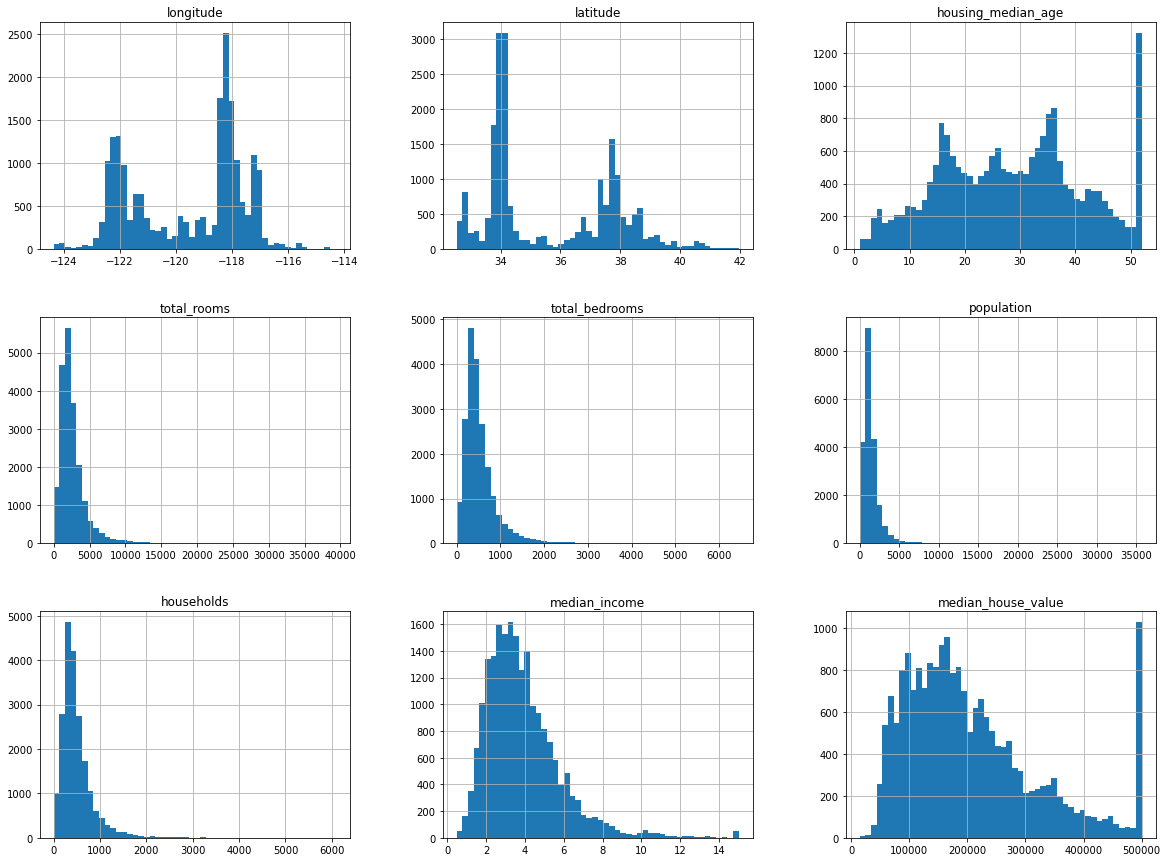

In [8]:
df.hist(bins=50,figsize=(20,15))

#### Splitting the data into train-test split

In [10]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=50)

#### Categorizing the income feature

In [13]:
df['income_cat'] = pd.cut(df['median_income'], bins = [0.,1.5,3.0,4.5,6.,np.inf],labels= [1,2,3,4,5])

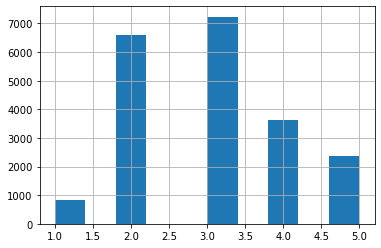

In [14]:
df['income_cat'].hist()

#### Visualizing geographical data

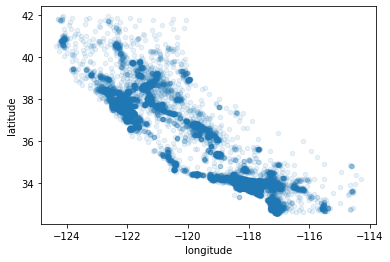

In [16]:
df.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha=0.1)

#### Detailed map based on house value

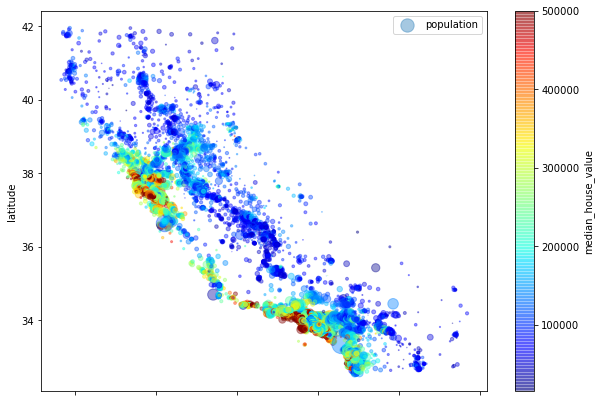

In [19]:
df.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4,
       s = df['population']/100, label = 'population', figsize = (10,7),
       c = 'median_house_value', cmap = plt.get_cmap('jet'), colorbar = True,)
plt.legend()

#### Checking Correlation between features

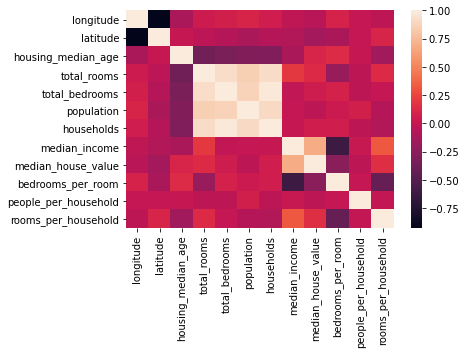

In [36]:
df_corr = df.corr(method='pearson')

sns.heatmap(df_corr, 
            xticklabels=df_corr.columns,
            yticklabels=df_corr.columns)

In [30]:
df_corr['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

*PS - Scatter matrix can also be used to check the cor-relation between the features*

#### Creating new features

In [34]:
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms'] 
df['people_per_household'] = df['population'] / df['households']
df['rooms_per_household'] = df['total_rooms'] / df['households']

In [37]:
df_corr['median_house_value'].sort_values(ascending=False)

median_house_value      1.000000
median_income           0.688075
rooms_per_household     0.151948
total_rooms             0.134153
housing_median_age      0.105623
households              0.065843
total_bedrooms          0.049686
people_per_household   -0.023737
population             -0.024650
longitude              -0.045967
latitude               -0.144160
bedrooms_per_room      -0.255880
Name: median_house_value, dtype: float64

### Preprocessing Data